# Bank Data set - Binary Classification Model

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Import Bank data set
address = '/Users/phillipgregory/Documents/Career/Data science/beginner_datasets/bank.csv'
df = pd.read_csv(address)

# View top 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Target variable is deposit
X = df.drop('deposit', axis=1)
y = df.deposit

## Data Quality Inspection

In [4]:
# Check null values
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [5]:
# Check data types
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

Text(0, 0.5, 'Cardinality')

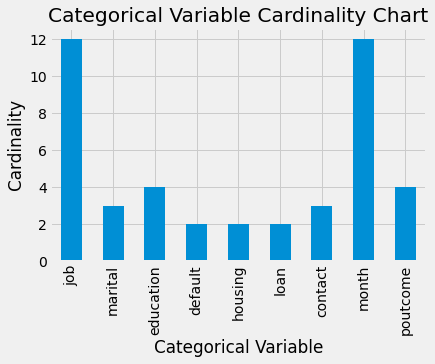

In [6]:
# Check cardinality of categorical variables
cat = [col for col in X.columns if X[col].dtype == 'object']

plt.style.use('fivethirtyeight')
X[cat].nunique().plot(kind='bar')
plt.title('Categorical Variable Cardinality Chart')
plt.xlabel('Categorical Variable')
plt.ylabel('Cardinality')

As the cardinality is reasonably low for each categorical variable, I will use One Hot Encoding on these.

In [7]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_encoded = pd.DataFrame(OH_encoder.fit_transform(X[cat]))

In [8]:
X.drop(cat, axis=1, inplace=True)

In [9]:
X_encoded = pd.concat([X, cat_encoded], axis=1)
X_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,0,1,2,...,34,35,36,37,38,39,40,41,42,43
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Create Binary Classification Model (Random Forest)

In [11]:
# Split predictor data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

# Instantiate Model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

/Users/phillipgregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/phillipgregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
# Check accuracy
from sklearn.metrics import accuracy_score

print("Model Accuracy: %.3f" % accuracy_score(y_pred,y_test))

Model Accuracy: 0.902
